### Ejercicio 1: Análisis de sentimientos de comentarios de Twitter.

Del siguiente link:

https://www.kaggle.com/code/ngyptr/python-nltk-sentiment-analysis/input

Descargue la información relacionada a comentarios.

1. Revise los valores nulos o incompletos que pueda contener la información de entrada.


In [2]:
# Espacio para desarrollar el código necesario.
import pandas as pd

try:
    df = pd.read_csv('./Sentiment.csv')
    print("Archivo leído correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'Sentiment.csv' no se encontró.")

print("\nVista previa del DataFrame:")
display(df.head())

Archivo leído correctamente.

Vista previa del DataFrame:


,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [3]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [4]:
# Cantidad de vlaores nulos por columna
print("\nCantidad de valores nulos por columna:")
null_counts = df.isnull().sum()
# Mostrar solo columnas con valores nulos
print(null_counts[null_counts > 0])

# Porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
null_percent = ((df.isnull().sum() / len(df)) * 100).round(2)
print(null_percent[null_percent > 0])


Cantidad de valores nulos por columna:
candidate                 96
subject_matter           326
candidate_gold         13843
relevant_yn_gold       13839
sentiment_gold         13856
subject_matter_gold    13853
tweet_coord            13850
tweet_location          3912
user_timezone           4403
dtype: int64

Porcentaje de valores nulos por columna:
candidate               0.69
subject_matter          2.35
candidate_gold         99.80
relevant_yn_gold       99.77
sentiment_gold         99.89
subject_matter_gold    99.87
tweet_coord            99.85
tweet_location         28.20
user_timezone          31.74
dtype: float64


Distribución de sentimientos:
sentiment
Negative    8493
Neutral     3142
Positive    2236
Name: count, dtype: int64

Porcentajes de cada sentimiento:
sentiment
Negative    61.23
Neutral     22.65
Positive    16.12
Name: proportion, dtype: float64


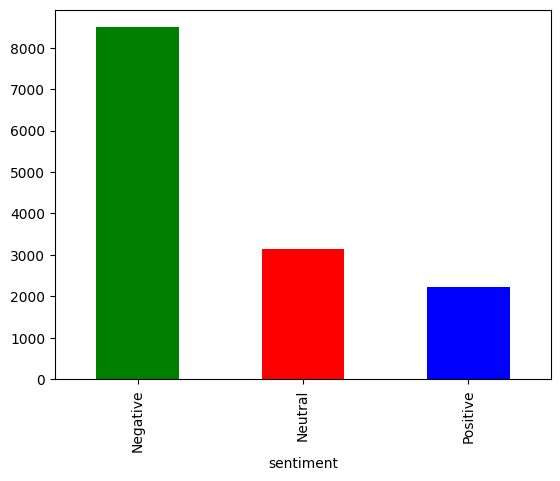

In [40]:
print("Distribución de sentimientos:")
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
print(df['sentiment'].value_counts())
print("\nPorcentajes de cada sentimiento:")
print((df['sentiment'].value_counts(normalize=True) * 100).round(2))

## Ejercicio 2: Conteo de palabras.

Usando la información anterior realice un análisis sobre la frecuencia de palabras, mustre un histograma con el conteo de las palabras )(Recuerde realizar un preprocesamiento a la columna, para que todos las variantes de la misma palabra sean tomadas en cuenta)

In [5]:
# Espacio para desarrollar el código necesario.

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import warnings

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Recursos adicionales de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PAUL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PAUL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
# Espacio para desarrollar el código necesario.

def preprocess_text(text):
    """Función para preprocesar el texto: limpieza, tokenización, eliminación de stopwords y lematización."""
    # Convertir a minúsculas
    text = str(text).lower()
    
    # Eliminar URLs, menciones y hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Eliminar signos de puntuación y numeros
    text = re.sub(r'[^\w\s]', '', text)
    
    # Toekenización y eliminación de stopwords
    stop_words = set(stopwords.words('english')) # Cambiar según el idioma del texto
    stop_words.update(['rt', 'amp'])  # Añadir palabras específicas
    tokens = text.split()
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return tokens

# Aplicar la función de preprocesamiento al DataFrame
df['tokens'] = df['text'].apply(preprocess_text)

# Verificación del resultado
print("\nEjemplo de texto preprocesado:")
display(df[['text', 'tokens']].head())


Ejemplo de texto preprocesado:


,text,tokens
0,RT @NancyLeeGrahn: How did everyone feel about...,"[everyone, feel, climate, change, question, la..."
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,"[didnt, catch, full, last, night, scott, best,..."
2,RT @TJMShow: No mention of Tamir Rice and the ...,"[mention, tamir, rice, held, cleveland, wow]"
3,RT @RobGeorge: That Carly Fiorina is trending ...,"[carly, fiorina, trending, hour, debate, men, ..."
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,"[w, delivered, highest, rating, history, presi..."


In [7]:
print(df.loc[0, 'tokens'])  # Muestra los tokens del primer texto como verificación
print(df.loc[0, 'text'])   # Muestra el texto original del primer texto como verificación

['everyone', 'feel', 'climate', 'change', 'question', 'last', 'night', 'exactly']
RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate


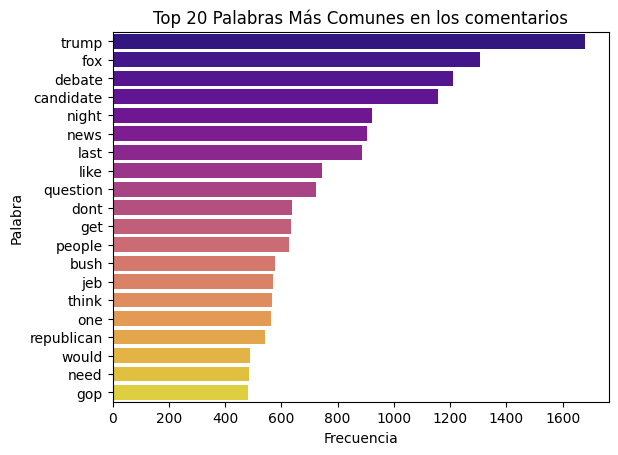

          word  frequency
0        trump       1679
1          fox       1306
2       debate       1210
3    candidate       1158
4        night        924
5         news        906
6         last        888
7         like        746
8     question        723
9         dont        639
10         get        634
11      people        629
12        bush        576
13         jeb        570
14       think        566
15         one        565
16  republican        541
17       would        488
18        need        485
19         gop        482


In [8]:
# Conteo de palabras
all_words = [word for lista in df['tokens'] for word in lista]

# Contar la frecuencia
count = Counter(all_words)
# Mostrar las 20 palabras más comunes
most_common_words = count.most_common(20)

df_freq = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

# Histograma de las palabras más comunes
plt.Figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=df_freq, palette='plasma')
plt.title('Top 20 Palabras Más Comunes en los comentarios')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

print(df_freq)

## Ejercicio 3: Análisis de sentimientos.
Usando algunas de las técnicas desarrolladas en clase, desarrolle una algoritmo que permita clasificar los comentarios como: positivos, negativos o neutros, en cada caso genere una nube de palabras.

Agregue comentarios o explicaciones breves en el códogo desarrollado.

Tipos de sentimientos encontrados: ['Neutral' 'Positive' 'Negative']


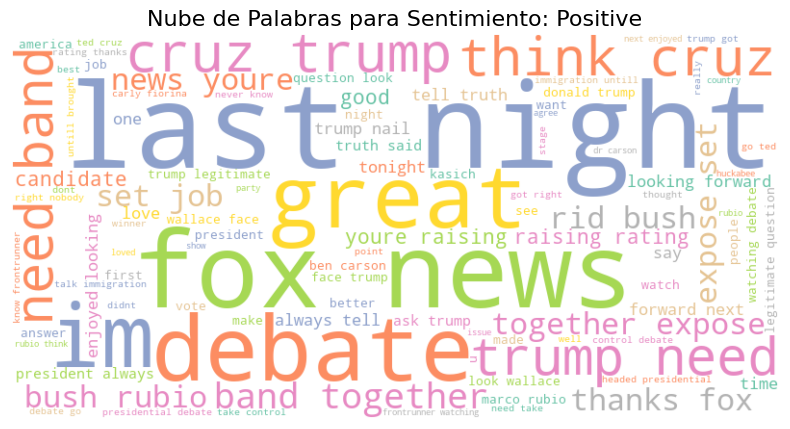

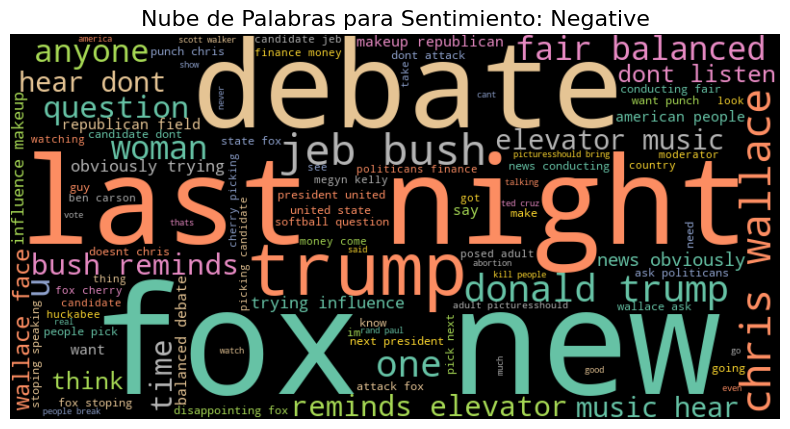

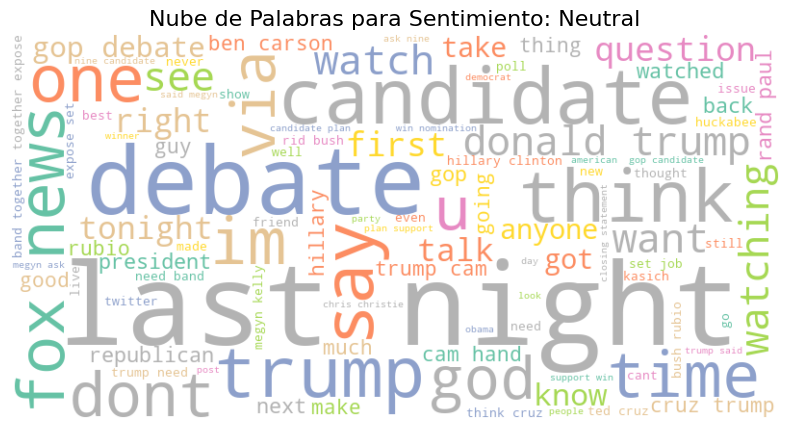

In [14]:
from wordcloud import WordCloud

def graphic_wordcloud(dataframe, sentiment_target, background_color):
    
    # Filtrar el dataframe para obtener solo las filas del sentimiento objetivo
    filtered_df = dataframe[dataframe['sentiment'] == sentiment_target]
    
    if filtered_df.empty:
        print(f"No hay datos para el sentimiento: {sentiment_target}")
        return
    
    # Unir todos los tokens en una sola cadena de texto
    text = ' '.join([word for lista in filtered_df['tokens'] for word in lista])
    
    # Configurar el objeto WordCloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color=background_color,
        max_words=100,
        colormap='Set2'
    ).generate(text)
    
    # graficar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off') # Ocultar los ejes X e Y
    plt.title(f'Nube de Palabras para Sentimiento: {sentiment_target}', fontsize=16)
    plt.show()

print(f"Tipos de sentimientos encontrados: {df['sentiment'].unique()}")

# Generar nubes de palabras para comentarios positivos
graphic_wordcloud(df, sentiment_target='Positive', background_color='white')

# Generar nubes de palabras para comentarios negativos
graphic_wordcloud(df, sentiment_target='Negative', background_color='black')

# Generar nubes de palabras para comentarios neutrales
graphic_wordcloud(df, sentiment_target='Neutral', background_color='white')

## Ejercicio 4. Clasificadores de documentos.

1. Diseñe un algoritmo para clasificar documentos.
2. Agregue detalles sobre su funcionamiento.
3. Enumere las librerias que podria usar y explique el por qué de su elección.
4. En caso de usar un modelo basado en Inteligencia Artificial explique su funcinamiento.


In [11]:
# Espacio para desarrollar el código necesario.

# 1er enfoque con RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparar los datos
# Filtrar solo positivos y Negativos para comparar 
df_binary = df[df['sentiment'].isin(['Positive', 'Negative'])].copy()

X = df_binary['text'] # Características (texto)
y = df_binary['sentiment'].map({'Positive': 1, 'Negative': 0})  # Etiquetas (sentimientos) convertidas a 1 y 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Vectorización TF-IDF (de texto a números)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)

# Evaluación del modelo con RandomForestClassifier
predicciones = model_rf.predict(X_test_tfidf)
print("Resultados del RandomForestClassifier:")
print(f"Precisión: {accuracy_score(y_test, predicciones) * 100:.2f}%")
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones, target_names=['Negative', 'Positive']))

Resultados del RandomForestClassifier:
Precisión: 84.95%

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negative       0.87      0.96      0.91      1713
    Positive       0.73      0.41      0.52       433

    accuracy                           0.85      2146
   macro avg       0.80      0.68      0.72      2146
weighted avg       0.84      0.85      0.83      2146



In [44]:
# 2do enfoque con keras y TensorFlow
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preparar los datos
df_keras = df[df['sentiment'].isin(['Positive', 'Negative'])].copy()

# Extrear textos reales
corpus_textos = df_keras['tokens'].apply(lambda x: ' '.join(x)).tolist() # Convertir listas de tokens a cadenas de texto

# Extrear etiquetas reales (1 para positivo, 0 para negativo)
etiquetas = df_keras['sentiment'].map({'Positive': 1, 'Negative': 0}).values

print("Datos reales cargandos para Keras.")
print(f" - Total frases: {len(corpus_textos)}")
print(f"Muestra de 5: {corpus_textos[:5]}")

Datos reales cargandos para Keras.
 - Total frases: 10729
Muestra de 5: ['didnt catch full last night scott best line 90 second', 'carly fiorina trending hour debate men justcompleted say shes', 'w delivered highest rating history presidential debate', 'first day rescind every illegal executive action taken barack obama', 'liked happy heard going moderator anymore']


In [45]:
# Tokenización 
NUM_WORDS = 5000 # Número máximo de palabras a considerar
MAX_LENGTH = 50 # Longitud máxima de las secuencias
TOKEN_OOV = '<OOV>' # Token para palabras fuera del vocabulario

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=TOKEN_OOV)
tokenizer.fit_on_texts(corpus_textos)
sequences = tokenizer.texts_to_sequences(corpus_textos)

# Padding de secuencias
X_data = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')
y_data = etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train_keras, X_val, y_train_keras, y_val = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    random_state=42
)

print(f"Forma de los datos de entrenamiento (X_train): {X_train_keras.shape}")
print(f"Forma de las etiquetas de entrenamiento (y_train): {y_train_keras.shape}")

Forma de los datos de entrenamiento (X_train): (8583, 50)
Forma de las etiquetas de entrenamiento (y_train): (8583,)


In [55]:
# ----- Proceso a realizar debido al desbalanceo de clases -----
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Calcular pesos de clase para manejar el desbalanceo
# Esto equilibra la balanza entre clases positivas y negativas, le da más peso a la clase minoritaria
pesos = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_keras),
    y=y_train_keras
)
class_weight_dict = dict(enumerate(pesos))
print(f"Pesos de clase calculados: {class_weight_dict}")

Pesos de clase calculados: {0: np.float64(0.6329646017699115), 1: np.float64(2.380199667221298)}


In [61]:
from sklearn.utils import resample

# Separar los datos en dos DataFrames según la clase
df_negativo = df_binary[df_binary['sentiment'] == 0]
df_positivo = df_binary[df_binary['sentiment'] == 1]

print(f"Original -> Negativos: {len(df_negativo)}, Positivos: {len(df_positivo)}")

Original -> Negativos: 0, Positivos: 0


In [56]:
# Arquitectura del modelo (LSTM)
DIMENSION_EMBEDDING = 32 # Tamaño del vector denso
UNITS_LSTM = 64 # Neuronas en la capa LSTM

model = keras.Sequential([
    # Capa 1: Embedding (Convierte enteros en vectores densos)
    keras.layers.Embedding(
        input_dim=NUM_WORDS,
        output_dim=DIMENSION_EMBEDDING,
        input_length=MAX_LENGTH,
        name='capa_embedding'
    ),
    # Capa 2: Dropout (Regularización) para evitar sobreajuste (Overfitting)
    keras.layers.Dropout(0.5, name='capa_dropout'), # dropout del 50% para evitar memorización
    
    # Capa 3: LSTM (Memoria a corto y largo plazo)
    keras.layers.LSTM(units=UNITS_LSTM, name='capa_lstm'),
    
    # Capa 4: Salida
    keras.layers.Dense(
        units=1,
        activation='sigmoid',
        name='capa_salida'
    )
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)
print("Resumen del modelo:")
model.summary()

# Entrenamiento del modelo

# Early Stopping para evitar sobreajuste
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

print("Iniciando el entrenamiento del modelo...")

history = model.fit(
    X_train_keras,
    y_train_keras,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict, # Aplicar pesos de clase para manejar el desbalanceo
    callbacks=[early_stop], # Agregar parada temprana
    verbose=1
)

Resumen del modelo:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_embedding (Embedding)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_dropout (Dropout)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_lstm (LSTM)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Iniciando el entrenamiento del modelo...
Epoch 1/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5030 - loss: 0.6938 - precision: 0.2087 - recall: 0.4892 - val_accuracy: 0.7982 - val_loss: 0.6807 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4116 - loss: 0.6934 - precision: 0.2136 - recall: 0.6717 - val_accuracy: 0.7982 - val_loss: 0.6783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7931 - loss: 0.6425 - precision: 0.5131 - recall: 0.2940 - val_accuracy: 0.7931 - val_loss: 0.5970 - val_precision: 0.4850 - val_recall: 0.4111
Epoch 4/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7956 - loss: 0.6154 - precision: 0.5147 - recall: 0.4753 - val_accuracy: 0.8103 - val_loss: 0.6015 - val_precision: 0.5533 - val_recall: 0.3118
Epoch 5/20
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8132 - loss: 0.6316 - precision:

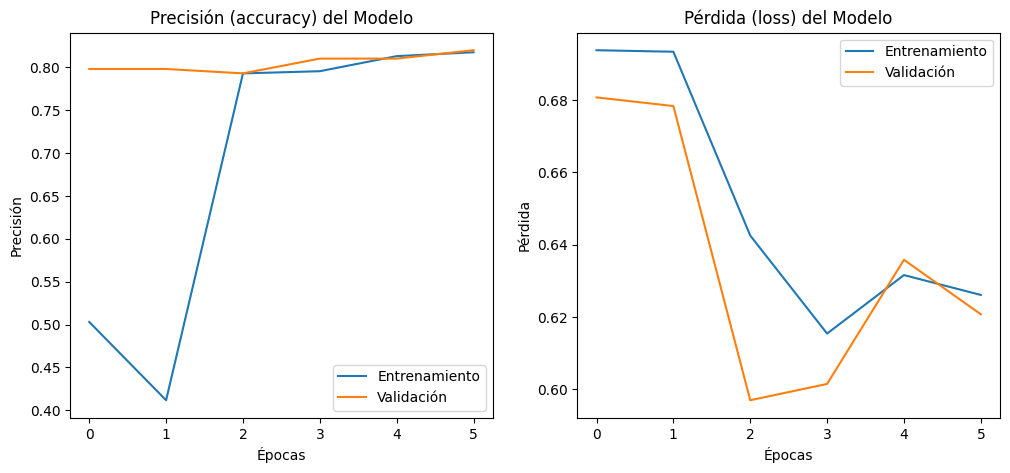

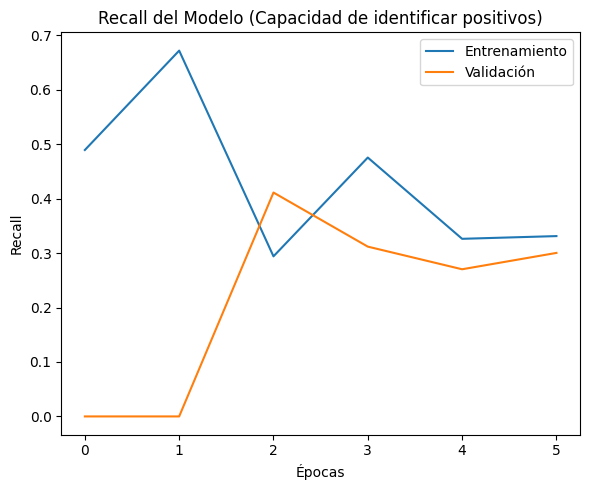

In [57]:
# Visualización de resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy) del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# gráfica de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (loss) del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# gráfica de recall (para ver qué tan bien se identifican los positivos)
plt.figure(figsize=(6, 5))
plt.plot(history.history['recall'], label='Entrenamiento')
plt.plot(history.history['val_recall'], label='Validación')
plt.title('Recall del Modelo (Capacidad de identificar positivos)')
plt.xlabel('Épocas')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()

plt.show()

In [58]:
# Prueba de predicción
def predict_sentiment(text):
    # Convertir a secuencia
    seq = tokenizer.texts_to_sequences([text])
    
    # Padding
    padded = pad_sequences(seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
    
    # Predicción
    pred = model.predict(padded)[0][0]
    
    etiqueta = 'Positivo' if pred > 0.5 else 'Negativo'
    print(f"Texto: {text}\nPredicción: {etiqueta} (Probabilidad: {pred:.4f})\n")


print("Pruebas de predicción:")
predict_sentiment("This candidate is amazing and honest") # Prueba positiva
predict_sentiment("The debate was terrible and boring")   # Prueba negativa

Pruebas de predicción:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Texto: This candidate is amazing and honest
Predicción: Negativo (Probabilidad: 0.3442)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Texto: The debate was terrible and boring
Predicción: Negativo (Probabilidad: 0.3442)



- Comparativa: "El modelo clásico (Random Forest) logró un 85% de precisión de inmediato, demostrando ser más eficiente para datasets pequeños y desbalanceados."

- Desafío Deep Learning: "El modelo LSTM sufrió inicialmente de desbalance de clases. Al aplicar pesos correctivos, el modelo osciló fuertemente (over-correction). Se requirió ajustar la tasa de aprendizaje y aumentar las épocas para que la red neuronal convergiera y aprendiera patrones semánticos reales en lugar de sesgos estadísticos."

- Recomendación: "Para producción rápida con menos de 50k datos, Random Forest o SVM (TF-IDF) son preferibles. Para mayor precisión a largo plazo con más datos, LSTM o Transformers (BERT) serían la elección ideal."